# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
import datetime
import io

# Code

In [2]:
# URL da API da Blockchain.info
url = 'https://blockchain.info/q/totalbc'

# Fazendo a requisição à API
response = requests.get(url)

# Convertendo a resposta da requisição para texto
total_btc = int(int(response.text)/100000000)

# Imprimindo o número de bitcoins em circulação
print('Total de bitcoins em circulação:', total_btc, 'BTC')


Total de bitcoins em circulação: 19296881 BTC


In [3]:
date = datetime.datetime(2023, 1, 1)
timestamp = int(date.timestamp())

url = f"https://api.blockchain.info/charts/total-bitcoins?timespan=all&format=csv&sampled=false&cors=true&start={timestamp}"

response = requests.get(url)

data = response.text
circulating_supply = pd.read_csv(io.StringIO(data))
circulating_supply = circulating_supply.rename(columns={circulating_supply.columns[0]: 'Datetime'})
circulating_supply = circulating_supply.rename(columns={circulating_supply.columns[1]: 'Circulating Supply'})

# Converter a coluna 'Datetime' para o tipo de data
circulating_supply['Datetime'] = pd.to_datetime(circulating_supply['Datetime'])

# Criar uma nova coluna 'Date' com apenas a data
circulating_supply['Date'] = circulating_supply['Datetime'].dt.date

# Agrupar os dados por dia e aplicar a função max() na coluna 'Circulating Supply'
circulating_supply = circulating_supply.groupby(['Date']).max()

# Remover a coluna 'Datetime' que não é mais necessária
circulating_supply.drop(['Datetime'], axis=1, inplace=True)

# Renomear a coluna 'Circulating Supply' para 'Max Circulating Supply'
circulating_supply.rename(columns={'Circulating Supply': 'Max Circulating Supply'}, inplace=True)

#circulating_supply = circulating_supply.set_index('Date')
circulating_supply.reset_index(inplace=True)

circulating_supply.head()

,Date,Max Circulating Supply
0,2023-01-01,19249637.50
1,2023-01-02,19250612.50
2,2023-01-03,19251575.00
3,2023-01-04,19252468.75
4,2023-01-05,19253450.00


<AxesSubplot:>

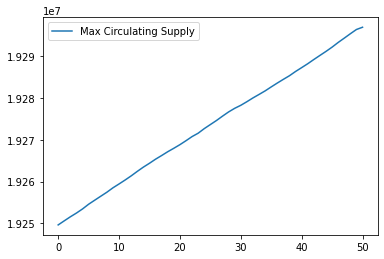

In [4]:
circulating_supply.plot()

In [5]:
date = datetime.datetime(2023, 1, 1)
timestamp = int(date.timestamp())

url = f"https://api.blockchain.info/charts/market-price?timespan=all&format=csv&sampled=false&cors=true&start={timestamp}"

response = requests.get(url)

data = response.text
market_price = pd.read_csv(io.StringIO(data))
market_price = market_price.rename(columns={market_price.columns[0]: 'Datetime'})
market_price = market_price.rename(columns={market_price.columns[1]: 'Market Price'})


market_price['Datetime'] = pd.to_datetime(market_price['Datetime'])

market_price['Date'] = market_price['Datetime'].dt.date

market_price = market_price.groupby(['Date']).max()

# Remover a coluna 'Datetime' que não é mais necessária
market_price.drop('Datetime', axis=1, inplace=True)

# Renomear a coluna 'Circulating Supply' para 'Max Circulating Supply'
market_price.rename(columns={'Market Price': 'Max Market Price'}, inplace=True)

market_price.reset_index(inplace=True)

market_price.head()

,Date,Max Market Price
0,2023-01-02,16613.71
1,2023-01-03,16671.54
2,2023-01-04,16669.60
3,2023-01-05,16850.63
4,2023-01-06,16826.41


<AxesSubplot:>

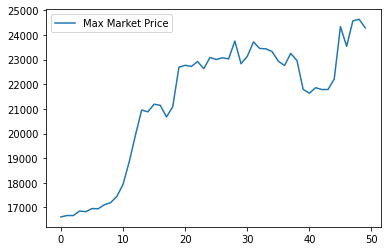

In [6]:
market_price.plot()

In [7]:
# Junta os dataframes market_price e circulating_supply baseado na coluna 'Date'
merged_df = pd.merge(market_price, circulating_supply, on='Date', how='inner')

# Cria uma nova coluna 'Market Value'
merged_df['Market Value'] = merged_df['Max Market Price'] * merged_df['Max Circulating Supply']

# Remove as colunas 'Market Price' e 'Circulating Supply'
#merged_df = merged_df.drop(['Max Market Price', 'Max Circulating Supply'], axis=1)

# Define a coluna 'Date' como index
#merged_df.set_index('Date', inplace=True)

# Mostra o novo dataframe
merged_df.head()




,Date,Max Market Price,Max Circulating Supply,Market Value
0,2023-01-02,16613.71,19250612.50,3.198241e+11
1,2023-01-03,16671.54,19251575.00,3.209534e+11
2,2023-01-04,16669.60,19252468.75,3.209310e+11
3,2023-01-05,16850.63,19253450.00,3.244328e+11
4,2023-01-06,16826.41,19254575.00,3.239854e+11


In [8]:
merged_df.rename(columns={'Max Market Price': 'Market Price', 'Max Circulating Supply': ' Circulating Supply'}, inplace=True)

merged_df.head()

,Date,Market Price,Circulating Supply,Market Value
0,2023-01-02,16613.71,19250612.50,3.198241e+11
1,2023-01-03,16671.54,19251575.00,3.209534e+11
2,2023-01-04,16669.60,19252468.75,3.209310e+11
3,2023-01-05,16850.63,19253450.00,3.244328e+11
4,2023-01-06,16826.41,19254575.00,3.239854e+11


In [9]:
merged_df.tail()

,Date,Market Price,Circulating Supply,Market Value
45,2023-02-16,24340.73,19293218.75,4.696110e+11
46,2023-02-17,23544.67,19294250.00,4.542767e+11
47,2023-02-18,24572.97,19295300.00,4.741428e+11
48,2023-02-19,24641.94,19296312.50,4.754986e+11
49,2023-02-20,24290.18,19296850.00,4.687240e+11


## Através de API Glassnode

[link](https://docs.glassnode.com/basic-api/endpoints/market)

In [26]:
#SOPR
'''
The Spent Output Profit Ratio (SOPR) is computed by dividing the realized value (in USD) divided by the value at creation (USD) 
of a spent output. Or simply: price sold / price paid. 
This metric was created by Renato Shirakashi. For a detailed commentary see this post.
'''

import json
import requests
import pandas as pd


# insert your API key here
API_KEY = ''

# make API request
res = requests.get('https://api.glassnode.com/v1/metrics/indicators/sopr',
    params={'a': 'BTC', 'api_key': API_KEY})

# convert to pandas dataframe
sopr = pd.read_json(res.text, convert_dates=['t'])

In [27]:
sopr.tail()

,t,v
4596,2023-02-15,1.008583
4597,2023-02-16,1.015120
4598,2023-02-17,1.003852
4599,2023-02-18,1.005204
4600,2023-02-19,1.005298


In [29]:
#Market Cap Realized
'''
Realized Cap values different part of the supplies at different prices (instead of using the current daily close). 
Specifically, it is computed by valuing each UTXO by the price when it was last moved.
'''

import json
import requests
import pandas as pd


# insert your API key here
API_KEY = ''

# make API request
res = requests.get('https://api.glassnode.com/v1/metrics/market/marketcap_realized_usd',
    params={'a': 'BTC', 'api_key': API_KEY})

# convert to pandas dataframe
mkt_cap_realized_usd = pd.read_json(res.text, convert_dates=['t'])

In [30]:
mkt_cap_realized_usd.tail()

,t,v
4791,2022-02-15,4.583189e+11
4792,2022-02-16,4.585352e+11
4793,2022-02-17,4.582529e+11
4794,2022-02-18,4.578976e+11
4795,2022-02-19,4.578588e+11


In [31]:
#Market Cap
'''
The market capitalization (or network value) is defined as the product of the current supply by the current USD price.
'''


import json
import requests
import pandas as pd


# insert your API key here
API_KEY = ''

# make API request
res = requests.get('https://api.glassnode.com/v1/metrics/market/marketcap_usd',
    params={'a': 'BTC', 'api_key': API_KEY})

# convert to pandas dataframe
mkt_cap = pd.read_json(res.text, convert_dates=['t'])

In [32]:
mkt_cap.tail()

,t,v
4596,2023-02-15,4.687167e+11
4597,2023-02-16,4.564245e+11
4598,2023-02-17,4.742125e+11
4599,2023-02-18,4.753625e+11
4600,2023-02-19,4.700420e+11


In [33]:
#MVRV
'''
MVRV is the ratio between market cap and realised cap. It gives an indication of when the traded price is below a “fair value”. 
This metric was created by David Puell and Murad Mahmudov.
'''

import json
import requests
import pandas as pd


# insert your API key here
API_KEY = ''

# make API request
res = requests.get('https://api.glassnode.com/v1/metrics/market/mvrv',
    params={'a': 'BTC', 'api_key': API_KEY})

# convert to pandas dataframe
mvrv = pd.read_json(res.text, convert_dates=['t'])

In [34]:
mvrv.tail()

,t,v
4231,2022-02-15,1.845015
4232,2022-02-16,1.818592
4233,2022-02-17,1.677812
4234,2022-02-18,1.657768
4235,2022-02-19,1.661957


In [36]:
mvrv_plot = mvrv.set_index(['t'])

<AxesSubplot:xlabel='t'>

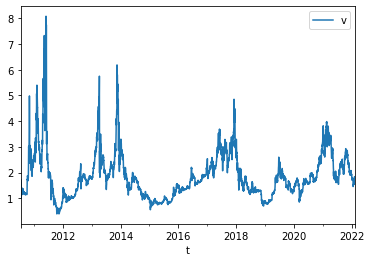

In [38]:
mvrv_plot.plot()

In [43]:
#MVRV ZScore
'''
The MVRV Z-Score is used to assess when Bitcoin is over/undervalued relative to its "fair value". 
When market value is significantly higher than realized value, it has historically indicated a market top (red zone), 
while the opposite has indicated market bottoms (green zone). 
Technically, MVRV Z-Score is defined as the ratio between the difference of market cap and realized cap, 
and the standard deviation of market cap, i.e. (market cap – realized cap) / std(market cap).
'''

import json
import requests
import pandas as pd


# insert your API key here
API_KEY = ''

# make API request
res = requests.get('https://api.glassnode.com/v1/metrics/market/mvrv_z_score',
    params={'a': 'BTC', 'api_key': API_KEY})

# convert to pandas dataframe
mvrv_zscore = pd.read_json(res.text, convert_dates=['t'])

In [44]:
mvrv_zscore.tail()

,t,v
4791,2022-02-15,1.544504
4792,2022-02-16,1.533300
4793,2022-02-17,1.262933
4794,2022-02-18,1.218545
4795,2022-02-19,1.223116


In [45]:
mvrv_zscore_plot = mvrv_zscore.set_index(['t'])

<AxesSubplot:xlabel='t'>

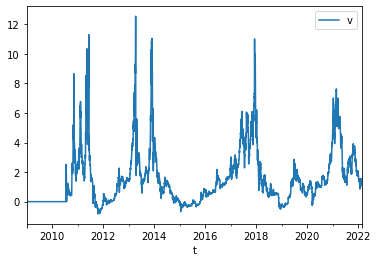

In [46]:
mvrv_zscore_plot.plot()

In [47]:
#Realized Price
'''
Realized Price is the Realized Cap divided by the current supply.
'''

import json
import requests
import pandas as pd


# insert your API key here
API_KEY = ''

# make API request
res = requests.get('https://api.glassnode.com/v1/metrics/market/price_realized_usd',
    params={'a': 'BTC', 'api_key': API_KEY})

# convert to pandas dataframe
realized_price = pd.read_json(res.text, convert_dates=['t'])

In [48]:
realized_price.tail()

,t,v
4791,2022-02-15,24173.664648
4792,2022-02-16,24183.829621
4793,2022-02-17,24167.687518
4794,2022-02-18,24147.885190
4795,2022-02-19,24144.650025
